In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC


In [3]:
df = pd.read_csv('/content/parkinson_disease.csv')
df.head()


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1.0
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1.0
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1.0
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1.0
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1.0


In [4]:

X = df.drop('class', axis=1)
y = df['class']


In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)


X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Train Size:", X_train.shape)
print("Validation Size:", X_val.shape)
print("Test Size:", X_test.shape)


ValueError: Input y contains NaN.

In [7]:
df = df.dropna(subset=['class'])


X = df.drop('class', axis=1)
y = df['class']


In [8]:
from sklearn.model_selection import train_test_split


X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [9]:
print("NaNs in features:", X.isna().sum().sum())
print("NaNs in target:", y.isna().sum())


NaNs in features: 0
NaNs in target: 0


In [10]:
print("Train Size:", X_train.shape)
print("Validation Size:", X_val.shape)
print("Test Size:", X_test.shape)

Train Size: (312, 754)
Validation Size: (67, 754)
Test Size: (68, 754)


In [11]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)


In [12]:
model = SVC(kernel='linear', probability=True, random_state=42)
model.fit(X_train, y_train)


SVC(kernel='linear', probability=True, random_state=42)

In [13]:
y_val_pred = model.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))


Validation Accuracy: 0.8507462686567164
              precision    recall  f1-score   support

         0.0       0.75      0.43      0.55        14
         1.0       0.86      0.96      0.91        53

    accuracy                           0.85        67
   macro avg       0.81      0.70      0.73        67
weighted avg       0.84      0.85      0.83        67



In [14]:
y_test_pred = model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Test Accuracy: 0.8823529411764706
              precision    recall  f1-score   support

         0.0       0.82      0.60      0.69        15
         1.0       0.89      0.96      0.93        53

    accuracy                           0.88        68
   macro avg       0.86      0.78      0.81        68
weighted avg       0.88      0.88      0.88        68



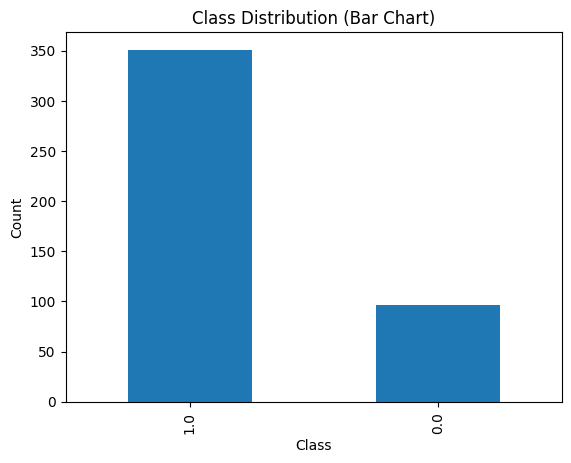

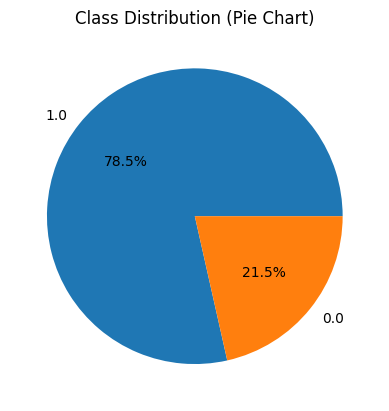

In [16]:
import pandas as pd
import matplotlib.pyplot as plt



df = df.dropna(subset=['class'])


class_counts = df['class'].value_counts()


plt.figure()
class_counts.plot(kind='bar')
plt.title('Class Distribution (Bar Chart)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


plt.figure()
class_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Class Distribution (Pie Chart)')
plt.ylabel('')
plt.show()
